In [19]:
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates

import cv2 # importar o opencv -> para instalar rode pip install opencv-python
import mediapipe as mp # para instalar rode pip install mediapipe
import numpy as np
import matplotlib.pylab as plt


import tensorflow as tf
from tensorflow import keras

In [6]:
webcam = cv2.VideoCapture(1)

reconhecimento_rosto = mp.solutions.face_detection # ativando a solução de reconhecimento de rosto
#desenho = mp.solutions.drawing_utils # ativando a solução de desenho
reconhecedor_rosto = reconhecimento_rosto.FaceDetection() # criando o item que consegue ler uma imagem e reconhecer os rostos ali dentro

while webcam.isOpened():
    validacao, frame = webcam.read() # lê a imagem da webcam
    if not validacao:
        break
    imagem = frame
    lista_rostos = reconhecedor_rosto.process(imagem) # usa o reconhecedor para criar uma lista com os rostos reconhecidos
    
    if lista_rostos.detections: # caso algum rosto tenha sido reconhecido
        for rosto in lista_rostos.detections: # para cada rosto que foi reconhecido
            #desenho.draw_detection(imagem, rosto) # desenha o rosto na imagem
            #image = imagem
            #output = rosto.copy()
            #circles = cv2.HoughCircles(rosto, cv2.HOUGH_GRADIENT, 1.2, 100)

            if rosto is not None:
                image_rows, image_cols, _ = imagem.shape
                location = rosto.location_data
                bounding_box = location.relative_bounding_box

                rect_start_point = _normalized_to_pixel_coordinates(
                    bounding_box.xmin, bounding_box.ymin, image_cols, image_rows
                )
                rect_end_point = _normalized_to_pixel_coordinates(
                    bounding_box.xmin + bounding_box.width,
                    bounding_box.ymin + bounding_box.height,
                    image_cols, image_rows
                )

                if rect_start_point is not None and rect_end_point is not None:
                    xleft, ytop = rect_start_point
                    xright, ybottom = rect_end_point
                
                img = imagem[ytop: ybottom, xleft: xright]
                cv2.imshow("Rosto Encontrado", img)

                if img is not None:
                    if cv2.waitKey(5) == 27:
                        fotoRosto = img
                        webcam.release()
                        break
    
    #cv2.imshow("Rostos na sua webcam", imagem) # mostra a imagem da webcam para a gente
    #if cv2.waitKey(5) == 27: # ESC # garante que o código vai ser pausado ao apertar ESC (código 27) e que o código vai esperar 5 milisegundos a cada leitura da webcam
        #break

webcam.release() 
cv2.destroyAllWindows() 

In [7]:
while True:
    fotoRosto = cv2.resize(fotoRosto, (128, 128))
    #cv2.imshow("Foto", fotoRosto)
    cv2.imshow("Foto", cv2.cvtColor(fotoRosto, cv2.COLOR_BGR2GRAY))
    cv2.waitKey(0)
    break
cv2.destroyAllWindows()

In [8]:
class_names = ["Saudavel", "Variola do Macaco"]

model = tf.keras.models.load_model("modelo/")
model.load_weights("checkpoint/")


#model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 49152)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               25166336  
                                                                 
 dense_13 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 25,167,362
Trainable params: 25,167,362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fotoRosto = cv2.cvtColor(fotoRosto, cv2.COLOR_BGR2GRAY)
fotoRosto = cv2.resize(fotoRosto, (128, 128))

In [12]:

cv2.imwrite("foto.png", fotoRosto)
aux = cv2.imread("foto.png")
aux = (np.expand_dims(aux, 0))

previsao = model.predict(aux)

resultado = class_names[np.argmax(previsao[0])]


1/1 [==============================] - 0s 416ms/step


In [17]:
fotoRosto = cv2.resize(fotoRosto, (256,256))
cv2.imshow(resultado, fotoRosto)
cv2.waitKey(0)
cv2.destroyAllWindows()

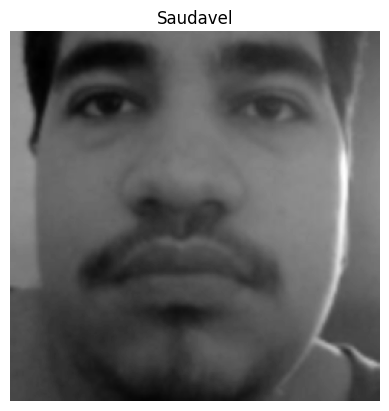

In [23]:
plt.title(resultado)
plt.axis("off")
plt.imshow(fotoRosto, cmap="gray")
plt.show()